## 2020 Israel Elections, Numerical Observations

In [1]:
import pandas as pd
import numpy as np

# read counted votes by city
df = pd.read_csv("https://media23.bechirot.gov.il/files/expc.csv", encoding='iso8859_8')

# establish list of parties
parties = df.columns[7:-1]

# sum votes and sort
top10 = df[parties].sum().sort_values(ascending=False).head(10)
top10

# extract call letters of top parties
call10 = top10.index.values
call10

df.head(2)

,סמל ועדה,שם ישוב,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ג,ודעם,...,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס,Unnamed: 37
0,18,אבו גווייעד שבט,967,2018,595,6,589,13,0,554,...,0,8,2,0,0,0,0,2,2,NaN
1,2,אבו גוש,472,4821,2718,36,2682,75,4,2157,...,2,123,0,2,0,0,1,4,14,NaN


### OB1 - Places best fitting national voting pattern

- Which are the places the vote closest to the national average?
- What does it say about such places?
- Do they show a special kind of mix? living environment?
- Interview a person from such a place. Does he/she feels it?

In [13]:
# add column r1 for ratio of smillarity to overall results
# nature of r1 is still under question (how to compute)

he_valid = 'כשרים'
he_voters = 'מצביעים'
he_place = 'שם ישוב'

top10r = top10.divide(df[he_valid].sum())
def calcFit(r):
    return(r.filter(items=call10).divide(r[he_valid]) - top10r).abs().sum()

df['fit_index'] = df.apply(lambda x: calcFit(x), axis=1)
df_sig_places = df[df[he_voters]>5000]
df_sel_cols = df_sig_places[np.concatenate([[he_place, he_voters, he_valid, 'fit_index'], call10])]
df1 = df_sel_cols.sort_values(by=['fit_index'], ascending=True).head(10)
df1.head(3).tail(2)

,שם ישוב,מצביעים,כשרים,fit_index,מחל,פה,ודעם,שס,ג,אמת,ל,טב,נץ,ז
1072,רחובות,74296,73986,0.278411,25292,24095,257,5644,3283,4854,5204,4644,443,71
406,חיפה,145488,144625,0.279874,38464,50081,14915,4218,5604,10395,14893,5020,356,154


### OB2 - Places noteworthy for throwing votes to dumpster

- Which are the places where highest percentage of voters voted for parties that did not make it into the parliment?
- What does it say about such a place?
- Is it small? big? are they concentrated around specific areas?
- Is the order by magnitude (rather than percentage) radically different?

In [3]:
call9 = call10[0:9]

def calcEffective(r):
    return(r[he_valid] - r.filter(items=call9).sum())

df['lost_votes'] = df.apply(lambda x: calcEffective(x), axis=1)
df['lost_ratio'] = df.apply(lambda x: x['lost_votes'] / x[he_valid], axis=1)
df[df['lost_votes'] >= 5].sort_values(by=['lost_ratio'], ascending=False).head(10)

,סמל ועדה,שם ישוב,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ג,ודעם,...,ץ,ק,קי,קך,קץ,שס,Unnamed: 37,fit_index,lost_votes,lost_ratio
158,5,בית זיד,353,113,74,1,73,19,0,1,...,0,5,1,0,0,1,NaN,1.088002,7,0.095890
236,18,גנאביב שבט,976,478,211,1,210,2,0,173,...,0,1,2,5,7,2,NaN,1.485271,19,0.090476
958,6,ערב אל נעים,1335,517,285,6,279,3,0,103,...,1,0,0,0,3,3,NaN,0.809487,18,0.064516
10,6,אבטליון,1275,308,233,0,233,35,0,7,...,0,0,0,0,0,0,NaN,0.917440,11,0.047210
462,18,יהל,1158,217,121,1,120,28,0,1,...,0,0,0,0,0,0,NaN,0.923276,5,0.041667
1160,18,שני,1287,466,319,0,319,26,2,0,...,0,1,0,0,0,3,NaN,0.542407,12,0.037618
316,4,גשור,4022,220,153,2,151,14,0,0,...,0,0,0,0,0,2,NaN,0.773077,5,0.033113
471,2,ייטב,3607,205,160,1,159,2,5,0,...,0,0,0,0,0,1,NaN,1.053848,5,0.031447
881,3,עגר,4501,1707,677,8,669,168,0,96,...,2,1,1,2,0,183,NaN,0.833719,16,0.023916
1015,18,קבועה שבט,1234,754,430,3,427,0,0,406,...,0,1,0,1,3,3,NaN,1.670053,10,0.023419


### OB3 - The lone voters

- Are there places where there was only one voter (or a very small number, 2?) that voted for a maor party
- How must it feel?
- Can he he/she be located?


In [4]:
call8 = call10[0:8]

def calcLone(r):
    r = r.filter(items=call8)
    r = r.where(r == 1, 0)
    return r.sum()

df['lone_voter'] = df.apply(lambda x: calcLone(x), axis=1)
df_lone = df[np.concatenate([[he_place, he_valid, "lone_voter"], call8])]
df_lone[df_lone[he_valid] > 5000].sort_values(by=['lone_voter'], ascending=False).head(10)

,שם ישוב,כשרים,lone_voter,מחל,פה,ודעם,שס,ג,אמת,ל,טב
235,גלגוליה,5065,3,2,29,4816,1,0,202,1,1
1195,תל שבע,5531,2,23,27,5414,6,1,23,1,2
926,עין מאהל,6575,2,35,15,6428,12,1,33,1,7
962,ערערהבנגב,5087,2,13,28,4871,6,1,125,1,2
589,כפר קרע,9232,1,112,34,8915,42,1,70,2,3
570,כפר כנא,10348,1,70,65,9787,62,1,296,37,5
523,כסיפה,5164,1,22,141,4866,12,1,63,9,3
870,סחנין,17085,1,39,120,16610,11,9,257,4,1
434,טורעאן,6030,1,24,53,5730,139,0,30,22,1
956,עראבה,12031,1,19,39,11899,5,8,19,1,4


### OB4 - Case study: Netz

- for the party of נץ - which was certain to not make it ...
- What can explain the large number of voters?
- Where are they?
- Do they define a "resistence"? hard-core? ??
- Interview

In [5]:
he_nz = 'נץ'
df['nz_ratio'] = df.eval('נץ/' + he_valid)
df_nz = df[[he_place, he_valid, he_nz, 'nz_ratio']]
df_nz[df_nz[he_nz] > 0].sort_values(by=['nz_ratio'], ascending=False).head(10)

,שם ישוב,כשרים,נץ,nz_ratio
485,יצהר,528,123,0.232955
385,חברון,215,39,0.181395
775,נגוהות,122,15,0.122951
598,כפר תפוח,485,53,0.109278
1107,שבי שומרון,444,45,0.101351
631,מבוא דותן,208,19,0.091346
74,אלון מורה,714,62,0.086835
231,בת עין,619,48,0.077544
943,עמיחי,66,5,0.075758
1037,קרית ארבע,3268,233,0.071297


### OB5 - Corona virus voters?

- Is data available for the "isolation" voting booths?
- Is the pattern similar to national
- What is the percentage of voters?
- Interview

In [6]:
# read counted votes by polling booth
df1 = pd.read_csv("https://media23.bechirot.gov.il/files/expb.csv", encoding='iso8859_8')
df1

,סמל ועדה,ברזל,שם ישוב,סמל ישוב,קלפי,ריכוז,שופט,בזב,מצביעים,פסולים,...,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס,Unnamed: 41
0,18,9870,אבו גווייעד שבט,967,1.0,1,0,585,126,2,...,0,6,1,0,0,0,0,0,2,NaN
1,18,9871,אבו גווייעד שבט,967,2.0,1,0,764,249,2,...,0,0,0,0,0,0,0,2,0,NaN
2,18,9872,אבו גווייעד שבט,967,3.0,1,0,669,220,2,...,0,2,1,0,0,0,0,0,0,NaN
3,2,736,אבו גוש,472,1.0,1,0,530,299,7,...,0,11,0,0,0,0,0,0,2,NaN
4,2,737,אבו גוש,472,2.0,1,0,693,388,6,...,0,18,0,0,0,0,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11167,2,1050,תקוע,3563,2.0,3,0,672,496,1,...,0,27,0,0,0,0,1,0,11,NaN
11168,2,1051,תקוע,3563,3.0,3,0,725,572,1,...,0,25,1,0,1,0,1,4,13,NaN
11169,18,10069,תראבין אצאנע שבט,970,1.0,1,0,520,48,0,...,0,4,0,0,0,0,0,0,0,NaN
11170,18,10070,תראבין אצאנעישוב,1346,1.0,1,0,587,206,0,...,0,2,1,0,1,0,0,0,0,NaN


In [7]:
he_comm = 'סמל ועדה'
he_booth = 'קלפי'
df1 = df1[df1[he_booth] > 642]
df1 = df1[df1[he_comm] >= 90]
df1

,סמל ועדה,ברזל,שם ישוב,סמל ישוב,קלפי,ריכוז,שופט,בזב,מצביעים,פסולים,...,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס,Unnamed: 41
6529,99,99976,מעטפות חיצוניות,9999,976.0,0,0,0,250,0,...,0,114,0,0,0,0,0,0,4,NaN
6530,99,99977,מעטפות חיצוניות,9999,977.0,0,0,0,251,0,...,0,120,0,0,0,0,0,0,2,NaN
6531,99,99978,מעטפות חיצוניות,9999,978.0,0,0,0,450,2,...,0,191,0,0,0,0,0,0,7,NaN
6532,99,99980,מעטפות חיצוניות,9999,980.0,0,0,0,440,1,...,0,186,0,0,0,0,0,0,11,NaN
6533,99,99981,מעטפות חיצוניות,9999,981.0,0,0,0,302,1,...,0,141,0,0,0,0,0,0,7,NaN
6534,99,99982,מעטפות חיצוניות,9999,982.0,0,0,0,440,2,...,0,202,0,0,0,0,0,0,9,NaN
6535,99,99984,מעטפות חיצוניות,9999,984.0,0,0,0,682,3,...,0,327,0,0,0,0,0,0,18,NaN
6536,99,99985,מעטפות חיצוניות,9999,985.0,0,0,0,453,0,...,0,271,0,0,0,0,0,0,8,NaN
6537,99,99986,מעטפות חיצוניות,9999,986.0,0,0,0,450,2,...,0,209,0,0,0,0,0,0,9,NaN
6538,99,99988,מעטפות חיצוניות,9999,988.0,0,0,0,201,1,...,0,129,0,0,0,0,0,0,0,NaN


In [8]:
def calcFit(r):
    return(r.filter(items=call10).divide(r[he_valid]) - top10r).abs().sum()

df1['fit_index'] = df1.apply(lambda x: calcFit(x), axis=1)
df1 = df1[np.concatenate([[he_place, he_valid, "fit_index"], call10])]
df11 = df1.sort_values(by=['fit_index'], ascending=True).head(10)
df11

,שם ישוב,כשרים,fit_index,מחל,פה,ודעם,שס,ג,אמת,ל,טב,נץ,ז
6539,מעטפות חיצוניות,252,0.463756,87,104,4,3,4,23,13,14,0,0
6540,מעטפות חיצוניות,235,0.494634,69,107,1,3,1,18,18,17,0,0
6531,מעטפות חיצוניות,448,0.506911,137,191,5,7,1,49,19,38,1,0
6529,מעטפות חיצוניות,250,0.531454,60,114,12,4,4,25,9,22,0,0
6530,מעטפות חיצוניות,251,0.550227,72,120,3,2,0,27,10,17,0,0
6533,מעטפות חיצוניות,301,0.559069,71,141,6,7,4,38,15,19,0,0
6532,מעטפות חיצוניות,439,0.560083,114,186,4,11,11,60,10,43,0,0
6537,מעטפות חיצוניות,448,0.569347,111,209,4,9,12,51,15,37,0,0
6535,מעטפות חיצוניות,679,0.606150,144,327,13,18,23,95,15,40,3,0
6534,מעטפות חיצוניות,438,0.620167,95,202,8,9,5,70,19,29,0,0


In [9]:
cols11 = df11.columns[3:-1]
cb = df11[cols11].sum()
cbs = cb/cb.sum()

ab = df[cols11].sum()
abs = ab/ab.sum()
idx = cbs.index
idx = [x[::-1] for x in idx]

data = {
    'Party': idx,
    'Corona Booths': cbs.values,
    'National Average': abs.values
}
df99 = pd.DataFrame(data, columns=['Party', 'Corona Booths', 'National Average'])
df99

,Party,Corona Booths,National Average
0,לחמ,0.256822,0.295750
1,הפ,0.455056,0.266971
2,םעדו,0.016051,0.126944
3,סש,0.019529,0.077183
4,ג,0.017389,0.060060
5,תמא,0.121990,0.058632
6,ל,0.038256,0.057611
7,בט,0.073836,0.052613
8,ץנ,0.001070,0.004236


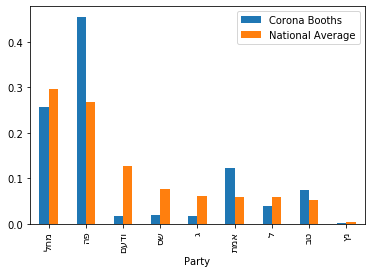

In [12]:
import matplotlib.pyplot as plt

df99.plot(x ='Party', y=['Corona Booths','National Average'], kind = 'bar')
plt.show()